Group XX (Name 1, Name 2, Name 3, Name 4)

# Homework 9

This homework focuses on optimization of multivariate functions. Lets start with the initializations as usual.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['figure.figsize'] = (5.0, 5.0)

%matplotlib inline

<div class="alert alert-info">
    
## Derivatives of Multivariate Functions
</div>

In the lecture, we have discussed gradient and Hessian of multivariate functions. Let's consider the following function $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ defined by

$$
f(x,y) = \sin(x^2) - \cos(y)^4 + \frac{1}{2}xy
$$

We can plot the graph of this function, i.e. the surface over the $(x,y)$-plane whose height is given by $f(x,y)$, over the rectangle $[-1,1]^2$:

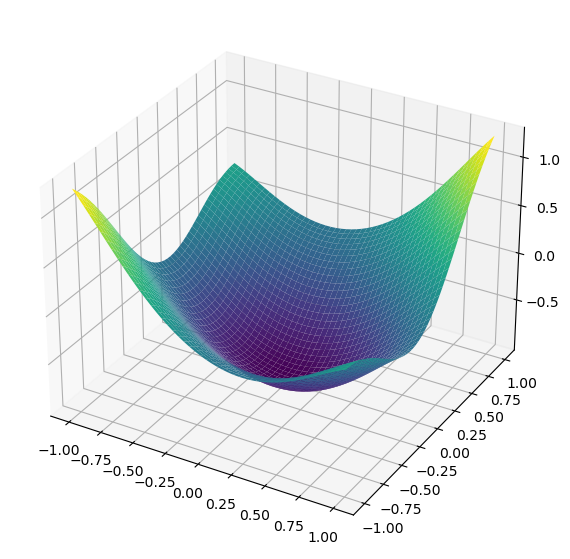

In [2]:
def func(x, y):
    """evaluate f at (x,y)"""
    return np.sin(x**2) - np.cos(y)**4 + 0.5*x*y

# define a grid 
X, Y = np.mgrid[-1:1:50j,-1:1:50j]

# make a surface plot of the graph of f
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, func(X, Y), cmap="viridis"); 

Looking closely, it appears that $f$ has a minimum at $(0,0)$. Let's verify that this is really the case. To do so, we need two ingredients:

1. The gradient $\nabla f(x,y) = (\frac{\partial f}{\partial x}(x,y), \frac{\partial f}{\partial y}(x,y))^\top$, which gives the local rates of change in the coordinate direction, and can also be interpreted as the direction of steepest ascent. A necessary condition for a minimum (or any other extremal point) at $(x,y)$ is that

$$
\nabla f(x,y) = 0.
$$

2. If the gradient is zero, a sufficient condition for a minimum in $(x,y)$ is that the Hessian matrix of $f$,
$$
H_f(x,y) = \begin{pmatrix} 
\frac{\partial^2 f}{\partial x\partial x}(x,y) &
\frac{\partial^2 f}{\partial x\partial y}(x,y) \\
\frac{\partial^2 f}{\partial y\partial x}(x,y) &
\frac{\partial^2 f}{\partial y\partial y}(x,y)
\end{pmatrix},
$$
is positive definite. Since it is symmetric ($\frac{\partial^2 f}{\partial x\partial y} = \frac{\partial^2 f}{\partial x\partial y}$), this is equivalent to all of its eigenvalues being positive.

<div class="alert alert-success">

**Task:** Verify, **analytically**, that $(0,0)$ is indeed a minimum of $f$.

Steps:
- Compute gradient and Hessian matrix of $f$ analytically.
- Validate that $\nabla f(0,0) = 0$.
- Evaluate $H_f(0,0)$ and compute its eigenvalues, by finding the roots of its characteristic polynomial.
- Check that all eigenvalues are positive.

Note: there is no implementation in this task -- use pen and paper, or a symbolic algebra tool of your choice.
</div>

**Solution:**

Gradient:
$$
\nabla f(x,y) = \text{<your solution here>}
$$

Gradient at $(0,0)$:
$$
\nabla f(0,0) = \text{<your solution here>}
$$

Hessian:
$$
H_f(x,y) = \text{<your solution here>}
$$

Hessian at $(0,0)$:
$$
H_f(0,0) = \text{<your solution here>}
$$

Characteristic polynomial of $H_f(0,0)$:
$$
\chi(H_f(0,0))\ =\ \text{<your solution here>}
$$

Roots of $\chi(H_f(0,0))$:
$$
\lambda_{1,2} = \text{<your solution here>}
$$

<div class="alert alert-success">
    
**Task:** Verify, **numerically**, that $(0,0)$ is indeed a minimum of $f$.

Steps:
- Implement functions for gradient (`gradient`) and Hessian (`Hessian`) of $f$ using the formulas from Task 1.
- Pass the assertions to validate that the gradient vanishes and the Hessian is positive definite.
</div>

In [3]:
def gradient(x, y):
    """evaluate the gradient of f at (x,y)"""
    # TODO
    
    f = np.sin(x**2) - np.cos(y)**4 + 0.5*x*y
    dfdx = 0.5*(4*x*np.cos(x**2)+y)
    dfdy = 0.5*(x+8*np.sin(y)*np.cos(y)**3)
    
#     return [0, 0]

    return [dfdx, dfdy]

def hessian(x, y):
    """evaluate the Hessian matrix of f at (x,y)"""
    # TODO
    
    H = [ [2*np.cos(x**2)-4*x**2*np.sin(x**2), 0.5], [0.5, 4*np.cos(y)**4-12*np.sin(y)**2*np.cos(y)**2]]
    
#     return [ [1, 0], [0, 1] ]

    return H

# TODO: verify (numerically) that $(0,0)$ is a minimum
assert np.allclose(gradient(0, 0), 0.0)

eig, _ = np.linalg.eig(hessian(0, 0))
assert np.all( eig > 0 )
print("The point (0,0) is a minimum.")

The point (0,0) is a minimum.


Let's look at two ways to visualize $f$ and its derivative.
    
One possibility is to use the contour plot. A *contour* or *level set* is the pre-image (German: *Urbild*) of some $v\in\mathbb R$ under $f$. In other words, given a value $v$, we can identify the set of all points $(x,y)$ such that $f(x,y) = v$. More formally, the level set is 

$$
I_f(v) := \big\{\ (x,y) \in \mathbb{R}^2\ |\ f(x,y) = v\ \big\}.
$$

Matplotlib's `contour` function takes a grid of sample points for $x$ and $y$, as well as the function value $f(x,y)$ at these points, and computes $I_f(v)$ for a set of suitably chosen values of $v$:

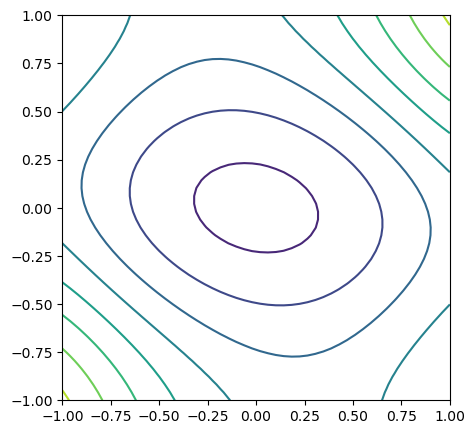

In [4]:
plt.contour(X, Y, func(X, Y));

Contours are quite analogous to height lines on a geographical map.

To visualize the gradients, we can use the `pyplot.quiver` function, which draws arrows at a selected set of points.

<div class="alert alert-success">

**Task:** Use the `pyplot.quiver` function to visualize $\nabla f$ on a $25\times 25$-grid over $[-1,1]^2$, on top of the contours.

Hint: Use `numpy.mgrid` as above to obtain the grid.
</div>

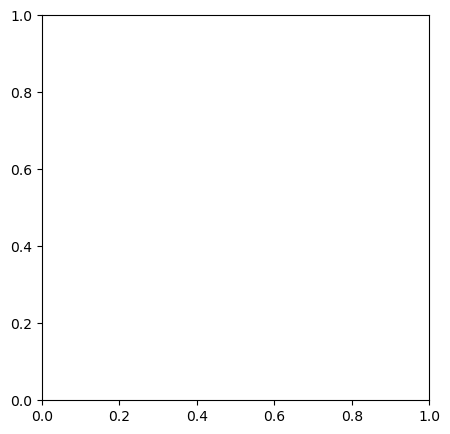

In [39]:
# TODO


fig, ax = plt.subplots()
X, Y = np.mgrid[-1:1:25j,-1:1:25j]


<div class="alert alert-info">

## Numerical Optimization - Steepest Descent Method
</div>

In the lecture, we have seen that the steepest descent method can be used to find the minumum of a function.
The task in this exercise is to analyze the steepest descent method to $f$: starting from some initial position $x_0,y_0$, we choose a step size $\alpha$ and perform the iteration

$$
(x_{i+1}, y_{i+1}) = (x_i,y_i) - \alpha \nabla f(x_i, y_i),
$$

i.e. we move along the reverse gradient to decrease the function value. The iteration is terminated once the change between successive iterates becomes small, i.e. when $\nabla f(x_i,y_i) < \varepsilon$ for some small $\varepsilon > 0$.

<div class="alert alert-success">

**Task:** Write a function `gradient_descent` below that performs the gradient descent procedure from the initial position $x_0,y_0$ and returns the sequence of the $(x_i,y_i)$. Use the provided visualization to validate that the iteration reaches $f$'s minimum at $(0,0)$.
</div>

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

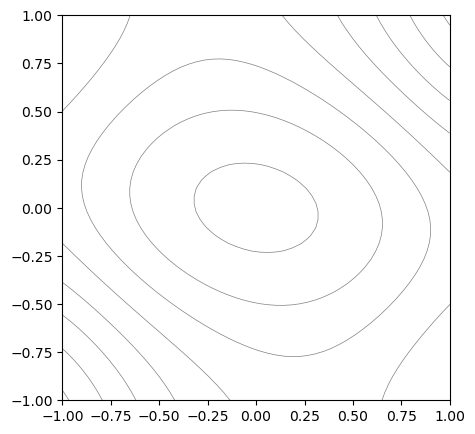

In [5]:
def gradient_descent(x0, y0, alpha = 0.1, eps=1e-6):
    """perform gradient descent starting at x0,y0, with step size alpha and error tolerance eps."""
    path = [(x0, y0)]
    
    x = x0
    y = y0
    
    while np.linalg.norm(gradient(x,y)) > eps:
 
        dfdx = 0.5*(4*x*np.cos(x**2)+y)
        dfdy = 0.5*(x+8*np.sin(y)*np.cos(y)**3)     
        
        x = x - alpha*dfdx
        y = y - alpha*dfdy
        
        path = np.append(x,y)
    

    # TODO
        
    return np.array(path)

plt.contour(X, Y, func(X, Y), colors='gray', linestyles='solid', linewidths=.5)

path = gradient_descent(-0.2, 0.2)
plt.plot( path[:,0], path[:,1], 'r');
print("The point (",path[-1,0],",",path[-1,1],") is reached after ",len(path)," iterations." )

Let's do an experiment: we perform the gradient descent for $(x_0,y_0)$ on a uniformly spaced grid, and record the path for every choice of starting point. Then, we plot all of these paths.

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

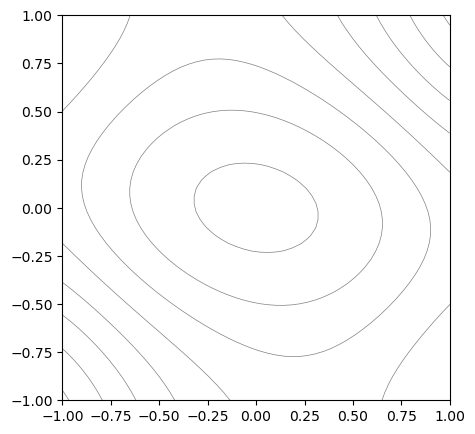

In [6]:
X0, Y0 = np.mgrid[-1:1:25j,-1:1:25j]

paths = []

for x0, y0 in zip(X0.ravel(), Y0.ravel()):
    paths.append( gradient_descent(x0, y0) )

plt.contour(X, Y, func(X, Y), colors='gray', linestyles='solid', linewidths=.5)

for path in paths:
    plt.plot( path[:,0], path[:,1], 'r', lw=1, alpha=0.5 )

Going one step further, we can color-code the lengths of the paths:

minimal path length: 1
maximal path length: 1


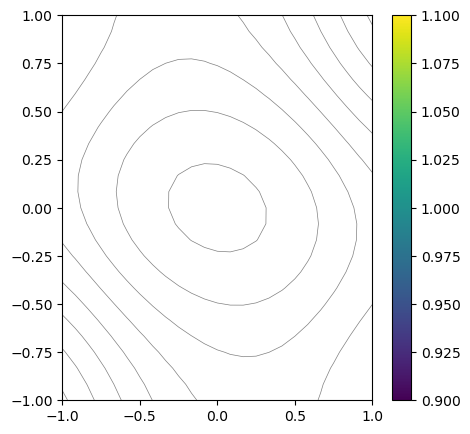

In [26]:
plt.contour(X, Y, func(X, Y), colors='gray', linestyles='solid', linewidths=.5)

minlen = min([len(p) for p in paths])
maxlen = max([len(p) for p in paths])
print( "minimal path length:", minlen )
print( "maximal path length:", maxlen )

import matplotlib.colors as colors
import matplotlib.cm as cmx

cmap = plt.get_cmap('viridis')
cnorm  = colors.Normalize(vmin=minlen, vmax=maxlen)
smap = cmx.ScalarMappable(norm=cnorm, cmap=cmap)

for path in paths:
    plt.plot( path[:,0], path[:,1], lw=1, alpha=0.5, color=smap.to_rgba(len(path)))
    
plt.colorbar(smap);

As we can see, some of the paths converge fairly quickly, other take much longer.

<div class="alert alert-info">

## Numerical Optimization - Newton's Method
</div>

In the lecture, we have seen that the Newton's method converges faster than the steepest descent method. The task in this exercise is to try it for finding the minimum of $f(x,y)$.

<div class="alert alert-success">
    
**Task:** Write a function `Newton_method` that computes the minimum of $f$ at $(x,y)$ using the damped Newton method. Try different values of $\alpha$ to find the setting which gives a good convergence. Compare your results with those that are obtained by the steepest-descent method.
</div>

In [ ]:
def Newton_method(x0, y0, alpha = 0.1, eps=1e-6):
    """perform damped-Newton method starting at x0,y0, with step size alpha and error tolerance eps."""
    path = [(x0, y0)]
    
    # TODO
        
    return np.array(path)

plt.contour(X, Y, func(X, Y), colors='gray', linestyles='solid', linewidths=.5)

path = Newton_method(-0.2, 0.2)
plt.plot( path[:,0], path[:,1], 'r');
print("The point (",path[-1,0],",",path[-1,1],") is reached after ",len(path)," iterations." )